In [61]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [5]:
pwd = os.getcwd()

In [64]:
img = cv2.imread(os.path.basename(pwd +'/image.png'))

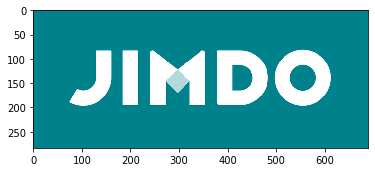

In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Image Processing

In [66]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

In [67]:
kernel = np.ones((2, 1), np.uint8)
gray = cv2.erode(gray, kernel, iterations=1)
dilation = cv2.dilate(gray, kernel, iterations=1)

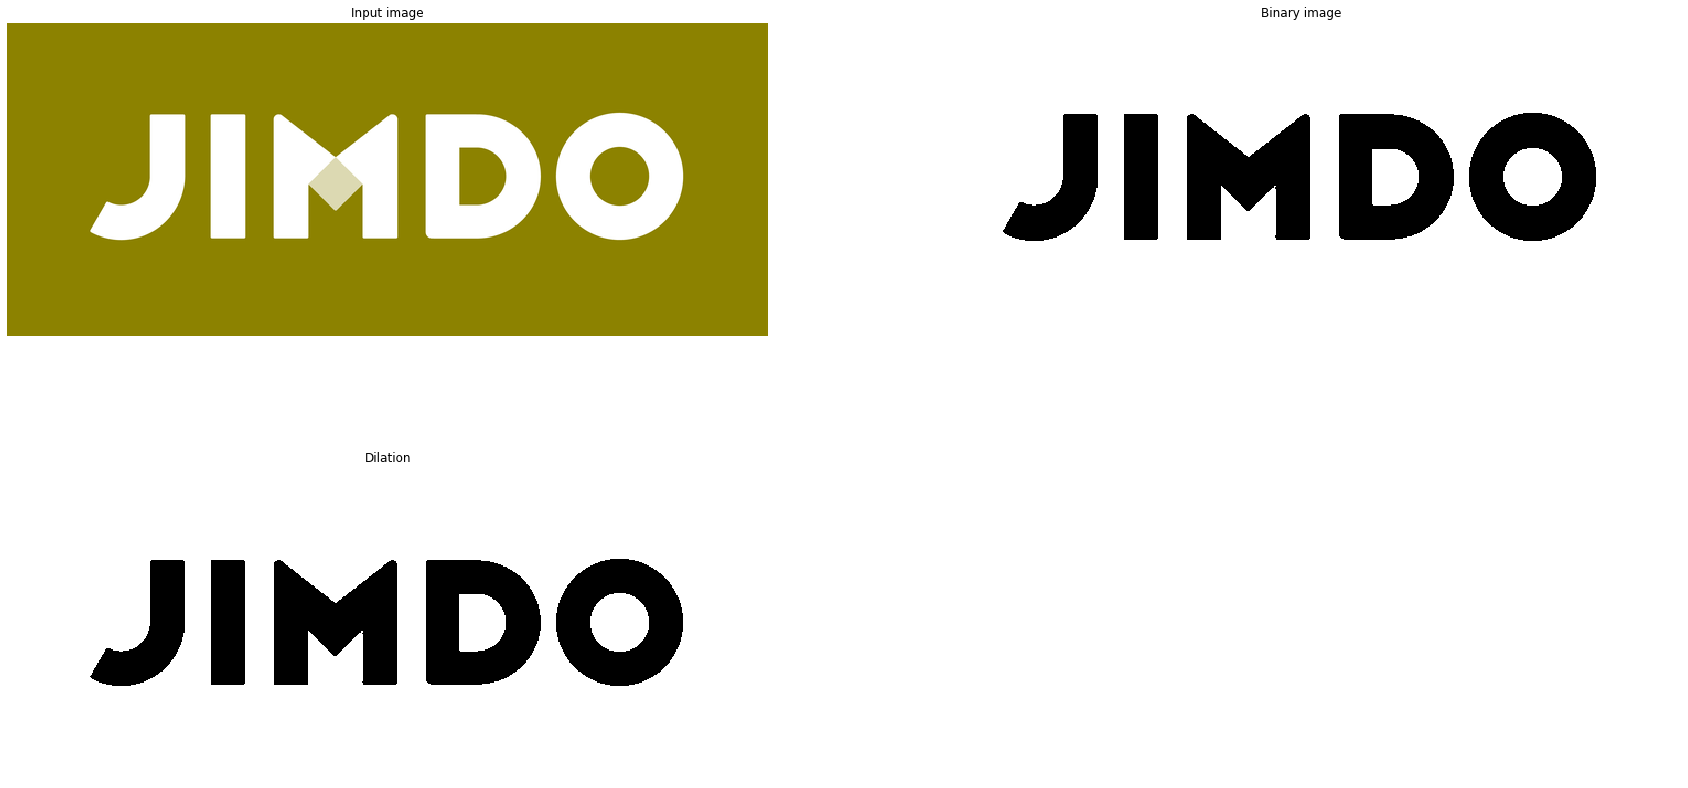

In [68]:
plot_image = [ img, gray, dilation]
plot_name = ["Input image","Binary image","Dilation"]
fig = plt.figure(figsize=(30,15)) 
grid = gridspec.GridSpec(ncols=2,nrows=2,figure = fig)

for i in range(len(plot_image)):
    fig.add_subplot(grid[i])
    plt.axis(False)
    plt.title(plot_name[i])
    if i ==0:
        plt.imshow(plot_image[i])
    else:
        plt.imshow(plot_image[i],cmap="gray")

In [69]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract'

In [70]:
out_below = pytesseract.image_to_string(dilation)

In [71]:
print("OUTPUT:", out_below)

OUTPUT: JIMDO

